In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


class MorrisLecar:

    def __init__(self, C=1, VL=-80, VK=-90, gL=8, gK=10, Vna = 60, gNa=20,
                 V1_2n=-25, V1_2m=-20, k_m = 15, k_n=5):
        self.C = C
        self.VL = VL
        self.Vna = Vna
        self.VK = VK
        self.gL = gL
        self.gNa = gNa
        self.gK = gK
        self.V1_2n = V1_2n
        self.V1_2m = V1_2m
        self.k_m = k_m
        self.k_n = k_n
        self.t = 100
        self.dt = 0.1
        self.tvec = np.arange(0, self.t, self.dt)
        self.V_list = None
        self.N = None


    def _system_equations(self, X, t, current):

        Mss = 1 / (1 + np.exp((self.V1_2m - X[0])/self.k_m))
        Nss = 1 / (1 + np.exp((self.V1_2n - X[0])/self.k_n))
        tau = 1 

        return [(1 / self.C) * (current - self.gL * (X[0] - self.VL) - self.gNa * Mss * (X[0] - self.Vna) - self.gK * X[1] * (X[0] - self.VK)),
                (Nss - X[1]) / tau]

    def run(self, X0=[-66, 0], current=1, t=100, dt=0.1, mode ='const', pulse_start = 0, pulse_end=0.4, step_start = 0.4):

        self.current = current
        self.t = t
        self.dt = dt
        if mode=='const':
            self.tvec = np.arange(0, self.t, self.dt)
            X = odeint(self._system_equations, X0, self.tvec, (current,))
            self.V, self.N = X[:, 0], X[:, 1]
        elif mode=='pulse':
            self.tvec1 = np.arange(pulse_start, pulse_end, self.dt)
            self.tvec2 = np.arange(pulse_end, t, self.dt)
            X = odeint(self._system_equations, X0, self.tvec1, (current,))
            X1 = odeint(self._system_equations, [X[-1,0], X[-1,1]], self.tvec2, (0,))
            self.V, self.N = [*X[:, 0], *X1[:,0]], [*X[:, 1], *X1[:, 1]]

        elif mode =='step':
            self.tvec1 = np.arange(0, step_start, self.dt)
            self.tvec2 = np.arange(step_start, t, self.dt)
            X = odeint(self._system_equations, X0, self.tvec1, (0,))
            X1 = odeint(self._system_equations, [X[-1,0], X[-1,1]], self.tvec2, (current,))
            self.V, self.N = [*X[:, 0], *X1[:,0]], [*X[:, 1], *X1[:, 1]]


## 2. 

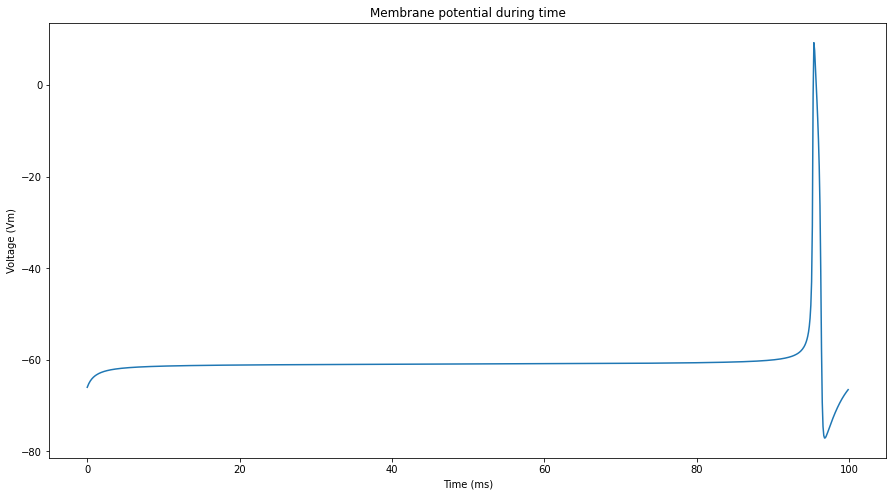

In [24]:
model = MorrisLecar()
model.run(current=4.518)
plt.figure(figsize=(15, 8))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time')
plt.plot(model.tvec, model.V)
plt.show()

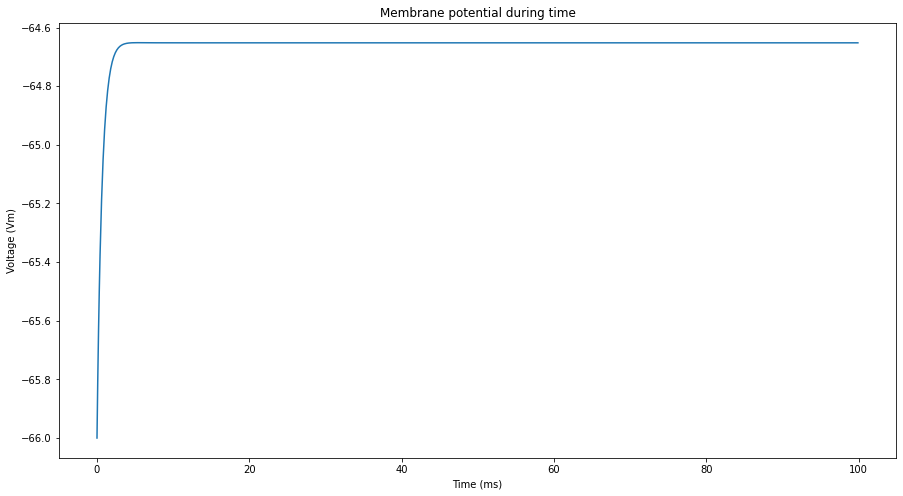

In [25]:
model = MorrisLecar()
model.run(current=2)
plt.figure(figsize=(15, 8))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time')
plt.plot(model.tvec, model.V)
plt.show()

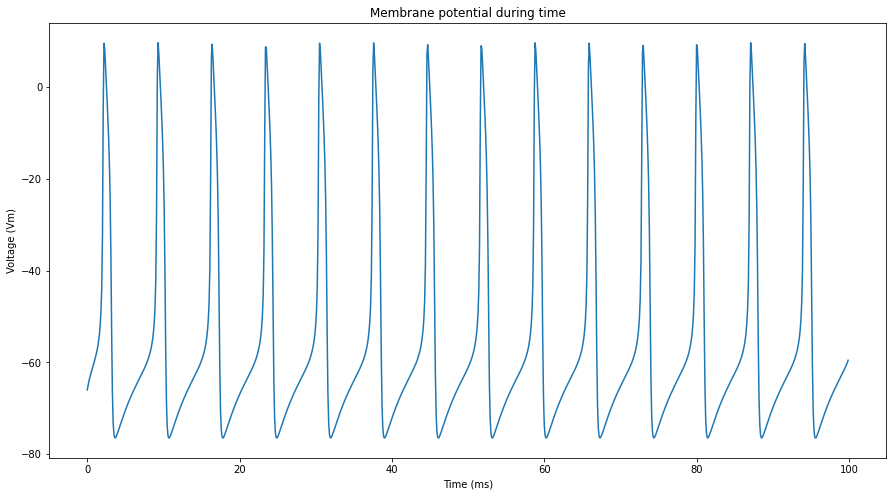

In [26]:
model = MorrisLecar()
model.run(current=10)
plt.figure(figsize=(15, 8))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time')
plt.plot(model.tvec, model.V)
plt.show()

## 4.

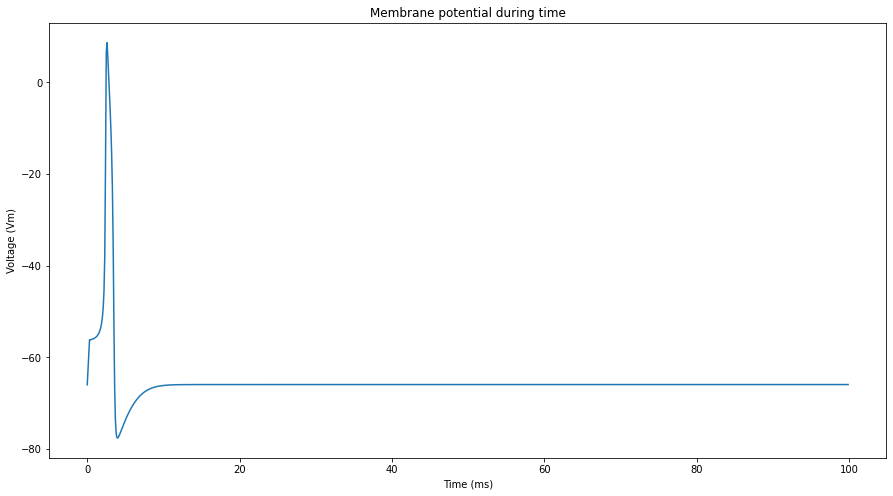

In [28]:
model = MorrisLecar()
model.run(current=35.5,mode='pulse')
plt.figure(figsize=(15, 8))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time')
plt.plot([*model.tvec1, *model.tvec2], model.V)
plt.show()

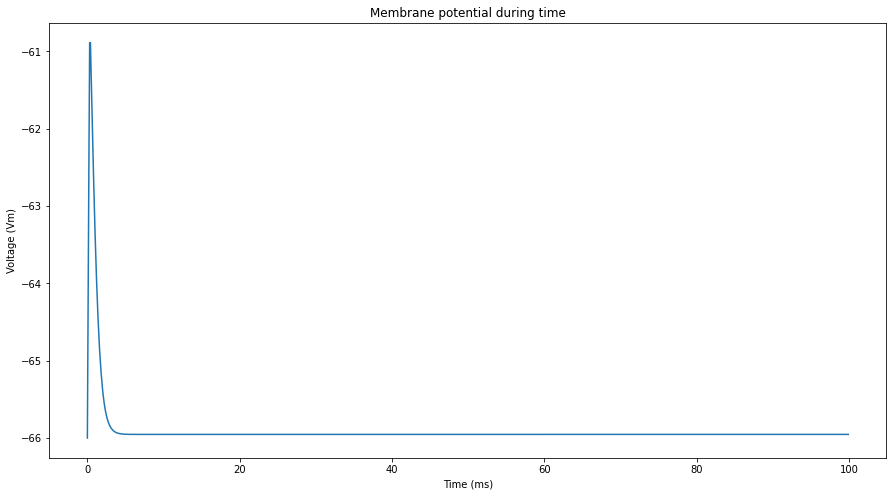

In [29]:
model = MorrisLecar()
model.run(current=20,mode='pulse')
plt.figure(figsize=(15, 8))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time')
plt.plot([*model.tvec1, *model.tvec2], model.V)
plt.show()

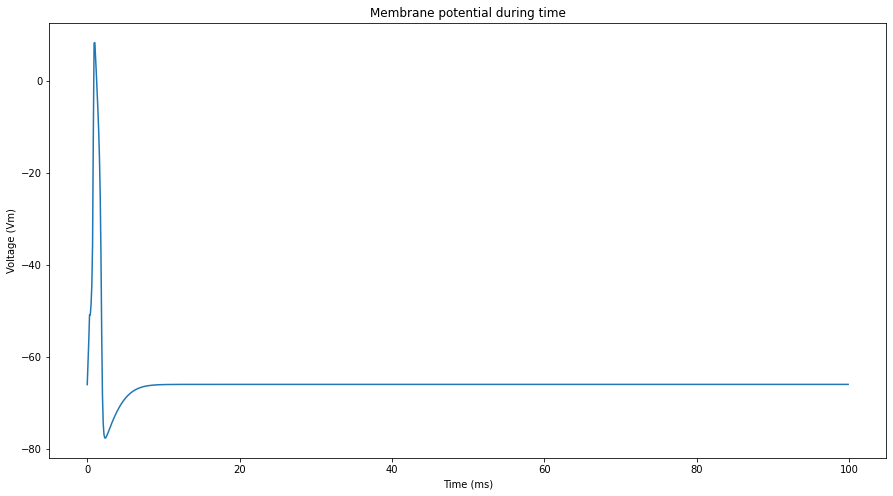

In [30]:
model = MorrisLecar()
model.run(current=50,mode='pulse')
plt.figure(figsize=(15, 8))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time')
plt.plot([*model.tvec1, *model.tvec2], model.V)
plt.show()